In [1]:
%matplotlib inline

# MNIST classfification using multinomial logistic + L1
# 基于L1惩罚的多项式Logistic回归模型的MINST手写数字数据集分类

Here we fit a multinomial logistic regression with L1 penalty on a subset of the MNIST digits classification task. We use the SAGA algorithm for this purpose: this a solver that is fast when the number of samples is significantly larger than the number of features and is able to finely optimize non-smooth objective functions which is the case with the l1-penalty. Test accuracy reaches > 0.8, while weight vectors remains *sparse* and therefore more easily *interpretable*.

Note that this accuracy of this l1-penalized linear model is significantly below what can be reached by an l2-penalized linear model or a non-linear multi-layer perceptron model on this dataset.

采用L1惩罚的多项式Logistic回归对MNIST手写数字数据集的一个子集进行分类，使用SAGA算法——这是一个快速的求解器，当样本数量明显大于特征数量时，在L1惩罚下，能够精准地优化非光滑目标函数。测试精度>0.8时，而权重向量保持*稀疏性*，因此更容易*分辨*手写数字。

值得注意的是，比起此数据集上的L2惩罚的线性模型或非线性多层感知器模型，L1惩罚的线性模型其精度更低。

In [2]:
print(__doc__)

# Author: Arthur Mensch <arthur.mensch@m4x.org>
# License: BSD 3 clause

import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

Automatically created module for IPython interactive environment


In [3]:
# Turn down for faster convergence
# 设置少量样本数，加快模型训练运行速度
t0 = time.process_time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
# 加载数据集
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [4]:
# seed=0，固定生成一组随机的序列，打乱数据集
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])

# 得到打乱之后的训练集
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

In [5]:
# 交叉校验，训练集5000条，测试集10000条
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000)

# 对训练集和测试集进行标准化处理
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
# 设置收敛容差，加快模型训练运行速度
clf = LogisticRegression(C=50. / train_samples,
                         multi_class='multinomial',
                         penalty='l1', solver='saga', tol=0.1)

# 训练模型
clf.fit(X_train, y_train)
# 计算稀疏度
sparsity = np.mean(clf.coef_ == 0) * 100
# 得到模型性能
score = clf.score(X_test, y_test)

# print("Sparsity with L1 penalty: %.2f%%" % sparsity)
# print("Test score with L1 penalty: %.4f" % score)
print("L1惩罚下的模型稀疏度: %.2f%%" % sparsity)
print("L1惩罚下的模型性能: %.4f" % score)

L1惩罚下的模型稀疏度: 81.81%
L1惩罚下的模型性能: 0.8296


本例运行时间：37.128 s


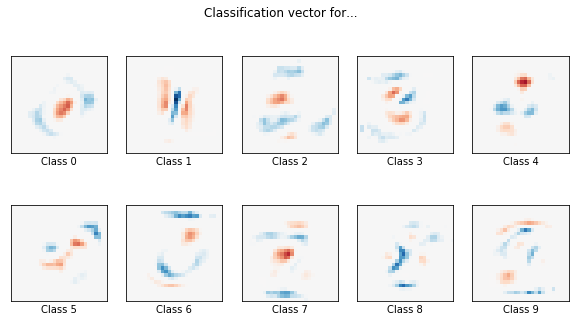

In [6]:
coef = clf.coef_.copy()
# 绘制图形，一共10个，每行5个
plt.figure(figsize=(10, 5))
# 取系数中绝对值最大的数
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    # 设置坐标轴，不显示坐标
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

run_time = time.process_time() - t0
# 打印运行时间
# print('Example run in %.3f s' % run_time)
print('本例运行时间：%.3f s' % run_time)
plt.show()

上图展示的是分类之后的模型，根据模型，能够更好的判断手写数字是属于哪一类的。